# Objective
Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results. This feature will help bring more
attention to newer apps that have potential.

The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights with supporting data/visualizations.

In [1]:
# import important packages

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the csv files to view the data
google_apps = pd.read_csv("D:\BoardInfinity\project\Python Assignment\Python Assignment 2\play_store_analysis.csv")
google_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_apps.shape

(10841, 13)

# 1. Data clean up – Missing value treatment

In [5]:
# Summary of a DataFrame.
google_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### A. Drop records where rating is missing since rating is our target/study variable

In [6]:
# Drop the rows having null values in the Rating field
google_apps = google_apps[~google_apps.Rating.isnull()]         # '~' --> Tilde operator returns opposite

In [7]:
# Check the number of nulls in the dataframe again and find the total number of null values
google_apps.isnull().sum()

# for checking the null values for col use
# df['col_name']isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [8]:
google_apps.shape

(9367, 13)

#### B. Check the null values for the Android Ver column.

In [9]:
# Check the number of nulls in the Android Ver field 
google_apps["Android Ver"].isnull().sum()

3

In [10]:
# Inspect the nulls in the Android Version column
google_apps[google_apps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# Drop the 3rd record
google_apps.loc[10472,:]         # For n'th row and all column
google_apps[(google_apps['Android Ver'].isnull() & (google_apps.Category == "1.9"))]
google_apps = google_apps[~(google_apps['Android Ver'].isnull() & (google_apps.Category == "1.9"))]

# Check the nulls again in Android version column to cross-verify
google_apps[google_apps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [12]:
# Fill up the nulls in the Android Version column with the above value
google_apps['Android Ver'] = google_apps['Android Ver'].fillna(google_apps['Android Ver'].mode()[0])

# Old values replaced by
print(google_apps['Android Ver'].loc[4453])
print(google_apps['Android Ver'].loc[4490])

4.1 and up
4.1 and up


In [13]:
# Check the nulls in the entire dataframe again
google_apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### C. Current ver – replace with most common value.

In [14]:
# The most common value in the Current version column
google_apps['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
1.4.3.104                1
1.9.117                  1
0.46.91                  1
6.10.0                   1
50.2 lite                1
Name: Current Ver, Length: 2638, dtype: int64

In [15]:
#Replace the nulls in the Current version column with the above value
google_apps['Current Ver'] = google_apps['Current Ver'].fillna(google_apps['Current Ver'].mode()[0])

In [16]:
google_apps['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
1.4.3.104                1
1.9.117                  1
0.46.91                  1
6.10.0                   1
50.2 lite                1
Name: Current Ver, Length: 2638, dtype: int64

# 2. Data clean up – correcting the data types

In [17]:
# Summary of a DataFrame.
google_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


#### A. Which all variables need to be brought to numeric types?

In [18]:
#Check the datatypes of all the columns 
google_apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
google_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


I thing there are couple of column in which we have to change the data type & they are Rating & Reviews.

#### B. Price variable – remove $ sign and convert to float

In [20]:
# Analyse the Price column to check the issue
google_apps['Price'].value_counts()

0        8719
$2.99     114
$0.99     107
$4.99      70
$1.99      59
         ... 
$8.49       1
$3.90       1
$4.77       1
$4.59       1
$2.00       1
Name: Price, Length: 73, dtype: int64

In [21]:
# Write the function to make the changes
google_apps['Price'] = google_apps['Price'].str.replace('$', '')

In [22]:
# Verify the column data
google_apps.Price.value_counts()

0         8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.59         1
389.99       1
2.59         1
2.00         1
1.76         1
Name: Price, Length: 73, dtype: int64

In [23]:
# Changeing the dtype of Price column
google_apps['Price']=google_apps[['Price']].astype(float)

In [24]:
# Verify the dtype of Price
google_apps['Price'].dtypes

dtype('float64')

#### C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [25]:
# Analyse the Install column to check the issue
google_apps['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [26]:
# Write the function to make the changes
google_apps['Installs'] = google_apps['Installs'].str.replace('+', '')
google_apps['Installs'] = google_apps['Installs'].str.replace(',', '')

In [27]:
# Verify the column data
google_apps['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [28]:
# Changeing the dtype of Price column
google_apps['Installs']=google_apps[['Installs']].astype(int)

In [29]:
#Verify the dtype of Installs
google_apps['Installs'].dtypes

dtype('int32')

#### D. Convert all other identified columns to numeric

In [30]:
#Check the datatypes of all the columns 
google_apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

So the columns which need to be converted are Rating, Size & Reviews.

In [31]:
# Changeing the dtype of above mensioned columns
google_apps['Rating']=google_apps[['Rating']].astype(float)
google_apps['Reviews']=google_apps[['Reviews']].astype(int)
google_apps['Size']=google_apps[['Size']].astype(int)

In [32]:
#Verify the dtype of columns
print(google_apps['Rating'].dtypes)
print(google_apps['Reviews'].dtypes)
print(google_apps['Size'].dtypes)

float64
int32
int32


In [33]:
# Verify all the datatypes of all the columns 
google_apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

The data that we have needs to make sense and therefore we can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

#### A.  Average rating should be between 1 and 5, as only these values are allowed on the play store.

    - Are there any such records? Drop if so.

In [34]:
# Perform the sanity checks on the Rating column
(google_apps['Rating']>5).sum()

0

#### B. Reviews should not be more than installs as only those who installed can review the app.
    - Are there any such records? Drop if so.

In [35]:
# Perform the sanity checks on the Reviews column
google_apps[(google_apps['Reviews'] > google_apps['Installs'])].shape

(7, 13)

In [36]:
google_apps.drop(google_apps[google_apps['Reviews']>google_apps['Installs']].index, axis=0, inplace=True)

In [37]:
# Verifying the shape of the Reviews column
google_apps[(google_apps['Reviews'] > google_apps['Installs'])].shape

(0, 13)

# 4. Identify and handle outliers –

#### A. Price column

    - Make suitable plot to identify outliers in price

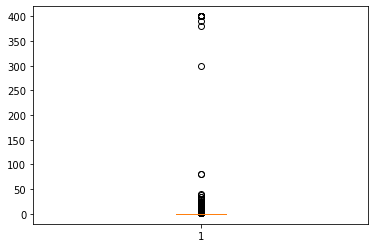

In [38]:
# Create a box plot for the price column
plt.boxplot(google_apps.Price)
plt.show()

    - Do you expect apps on the play store to cost $200? Check out these cases

In [39]:
# Check the apps with price more than 200
google_apps[google_apps.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
# Clean the Price column
google_apps.drop(google_apps[google_apps['Price']>200].index, axis=0, inplace = True)

In [41]:
# verifying if values are droped or not
google_apps[google_apps['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


    - After dropping the useless records, make the suitable plot again to identify outliers

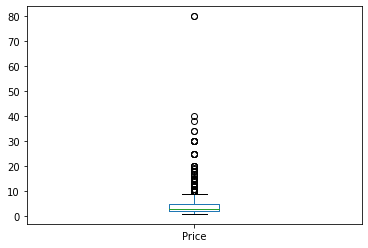

In [42]:
# Create a box plot for paid apps
google_apps[google_apps.Price>0].Price.plot.box();

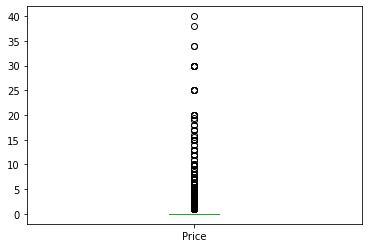

In [43]:
# Still i can find outliers so lets consider price < 45
google_apps[google_apps.Price<45].Price.plot.box();

    - Limit data to records with price < $30

In [44]:
# Clean the Price column again
google_apps = google_apps[google_apps.Price <= 30]
google_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### B. Reviews column
    - Make suitable plot

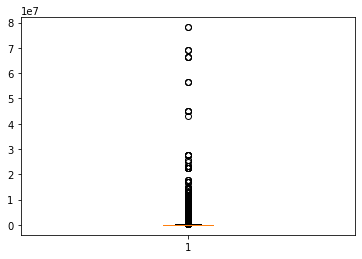

In [45]:
# Create a box plot for the price column
plt.boxplot(google_apps.Reviews)
plt.show()

    - Limit data to apps with < 1 Million reviews

In [46]:
# Check records with 1 million reviews
google_apps[google_apps['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [47]:
# Drop the above records
google_apps.drop(google_apps[google_apps['Reviews']>=1000000].index, axis=0, inplace=True)
google_apps[google_apps['Reviews']>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### C. Installs

    - What is the 95th percentile of the installs?

In [48]:
# 95th Percentile of Installs
google_apps.Installs.quantile(0.95)

10000000.0

    - Drop records having a value more than the 95th percentile

In [49]:
google_apps.drop(google_apps[ google_apps['Installs']>100000000.0 ].index, axis=0, inplace = True )

In [50]:
google_apps[google_apps['Installs']>100000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

#### A. How do you explain this?

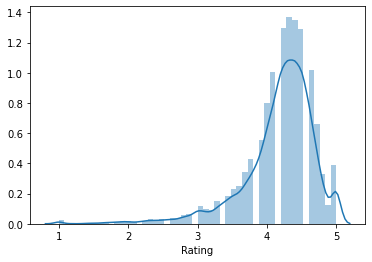

In [51]:
#Create a distribution plot for rating
sns.distplot(google_apps.Rating);

The above graph is negatively-skewed which means mean < mode.

#### B. What is the implication of this on your analysis?

We see here that the rating is mostly concentrated between 3 and 5, Rating is our important parameter which tells how app is performing.

## 6. What are the top Content Rating values?

#### A. Are there any values with very few records?

In [52]:
#Analyse the Content Rating column
google_apps['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records.

#### B. If yes, drop those as they won’t help in the analysis

In [53]:
# Remove the rows with values which are less represented 
google_apps[(google_apps['Content Rating']=='Adults only 18+') | (google_apps['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [54]:
# Drop the above records
google_apps.drop(google_apps[(google_apps['Content Rating']=='Adults only 18+') | (google_apps['Content Rating']=='Unrated')].index, axis=0, inplace = True)
google_apps[(google_apps['Content Rating']=='Adults only 18+') | (google_apps['Content Rating']=='Unrated')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 7. Effect of size on rating

#### A. Make a joinplot to understand the effect of size on rating

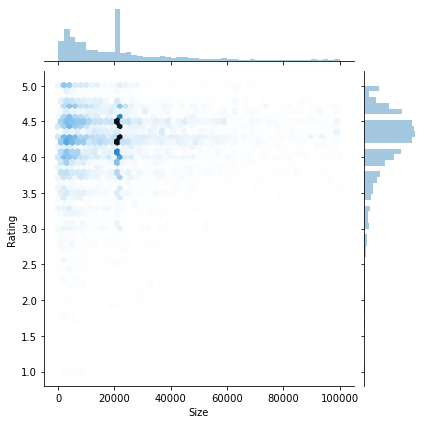

In [55]:
# Plot a joinplot plot for Size and Rating and observe the Effect
sns.jointplot(x ='Size', y ='Rating', data = google_apps, kind = 'hex');

We can see that the relation B/W Ratings & Size in inversely proportional. As size increases ratings decreases and visa versa.

#### B. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

#### C. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating

#### A. Make a jointplot (with regression line)

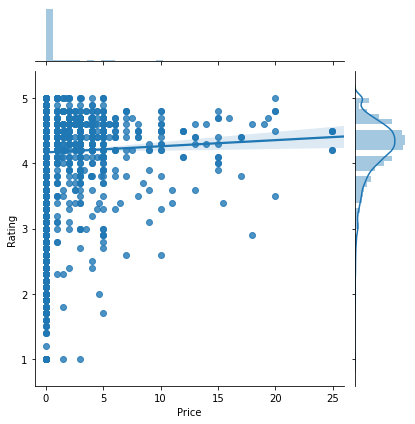

In [56]:
# Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(x='Price', y='Rating', data=google_apps, kind='reg');
plt.xlim(-1,26);

#### B. What pattern do you see?

There is no significant change occur but there is slight increment.

#### C. How do you explain the pattern?

As per above graph i can say that there are more free app with more rating than compared to paid apps.

#### D. Replot the data, this time with only records with price > 0

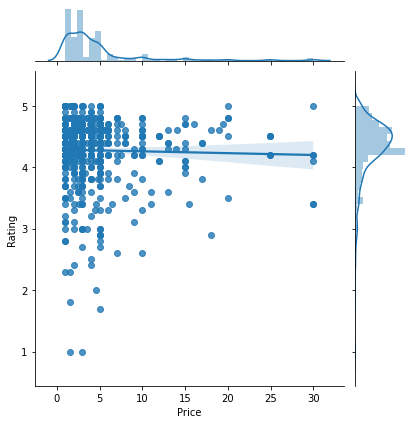

In [57]:
# Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot("Price", "Rating", data=google_apps[google_apps.Price>0], kind="reg")
plt.show()

#### E. Does the pattern change?

Yes, After apllying condition i can see a slightly negative correlation.

#### F. What is your overall inference on the effect of price on the rating

After seeing all the reults i can say that there is not much signifcant effect on Higher Rating.

# 9. Look at all the numeric interactions together –

#### A. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

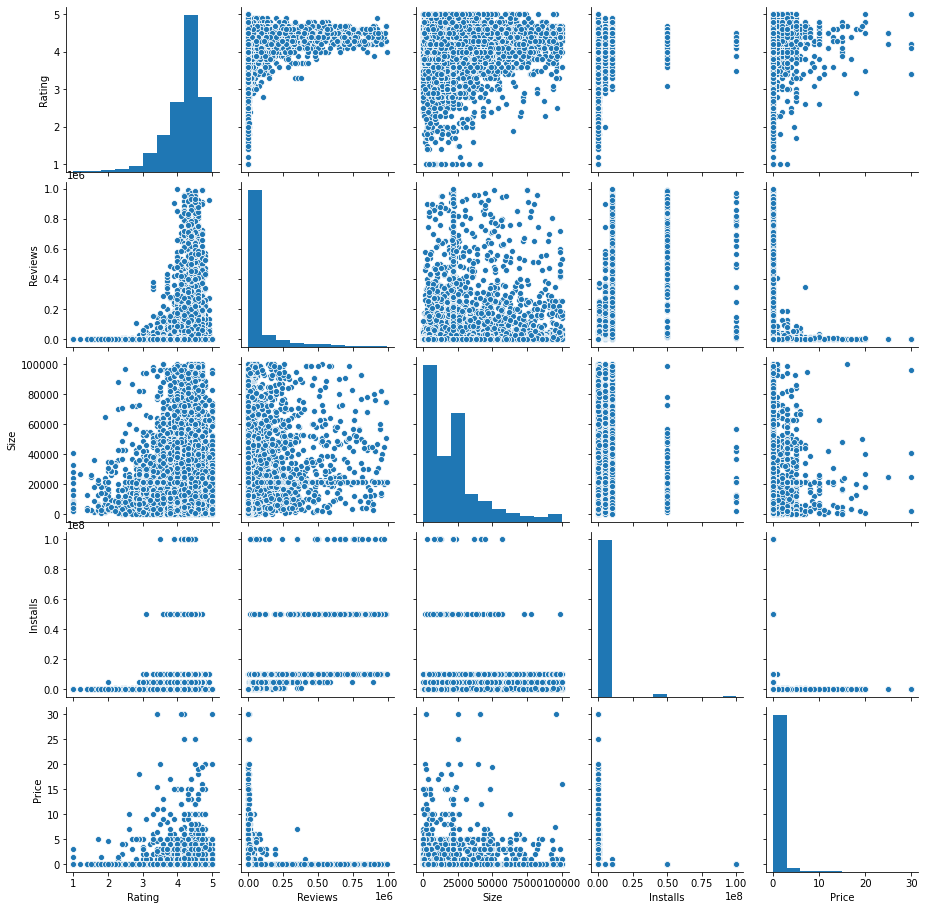

In [58]:
sns.pairplot(google_apps);

# 10. Rating vs. content rating

#### A. Make a bar plot displaying the rating for each content rating



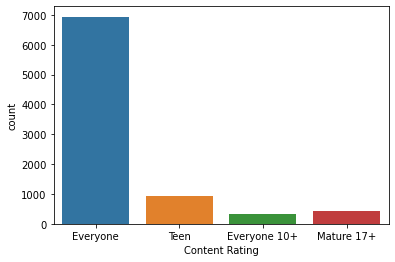

In [59]:
# Plot a bar plot of Content Rating vs Rating 
sns.countplot(x='Content Rating', data=google_apps);

#### B. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating.I think median is the best measure of central tendency.

#### C. Choose the right metric and plot

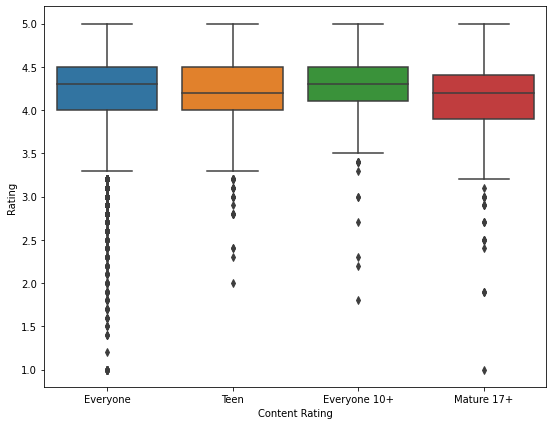

In [60]:
plt.figure(figsize=[9,7])
sns.boxplot(google_apps['Content Rating'], google_apps['Rating'])
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

#### A. Create 5 buckets (20% records in each) based on Size


   


In [61]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
bins=[0, 20000, 40000, 60000, 80000, 100000]
google_apps['Bucket Size'] = pd.cut(google_apps['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [62]:
# Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(google_apps, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146001,4.247561,4.010582,4.185294
20k-40k,4.203377,4.166667,4.156291,4.174679
40k-60k,4.171457,4.265217,4.190476,4.242982
60k-80k,4.243939,4.280769,4.200000,4.273016
80k-100k,4.260127,4.304762,4.252632,4.269231


#### B. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [63]:
##Change the aggregation to 20th percentile
pd.pivot_table(google_apps, values='Rating', index='Content Rating', columns='Bucket Size', aggfunc=lambda x:x.quantile(0.2) )

Bucket Size,0-20k,20k-40k,40k-60k,60k-80k,80k-100k
Content Rating,,,,,
Everyone,3.80,4.0,3.9,4.0,4.04
Everyone 10+,4.02,4.0,4.1,4.0,4.10
Mature 17+,3.50,4.0,4.1,4.0,4.00
Teen,3.90,3.9,4.0,4.0,4.00


#### C. Make a heatmap of this
    - Annotated

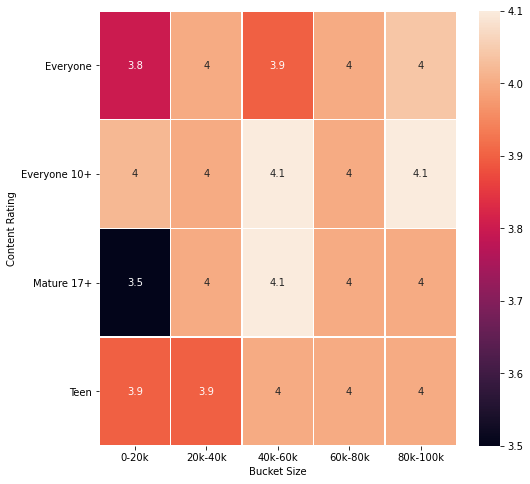

In [64]:
# Apply customisations
plt.figure(figsize=(8,8))
sns.heatmap(pd.pivot_table(google_apps, values='Rating', index='Content Rating', columns='Bucket Size', aggfunc=lambda x:x.quantile(0.2) ), linewidths=.5, annot=True)
plt.yticks(rotation = 0);
plt.show()

    - Greens color map

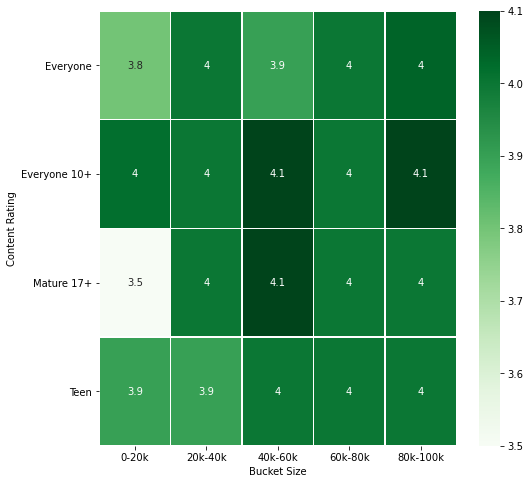

In [65]:
# Apply customisations
plt.figure(figsize=(8,8))
sns.heatmap(pd.pivot_table(google_apps, values='Rating', index='Content Rating', columns='Bucket Size', aggfunc=lambda x:x.quantile(0.2) ), cmap = "Greens", linewidths=.5, annot=True)
plt.yticks(rotation = 0);
plt.show()

#### D. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

No, We can not generallize by saying that but we can say that heavier apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories

# Some Extra Insights are :-

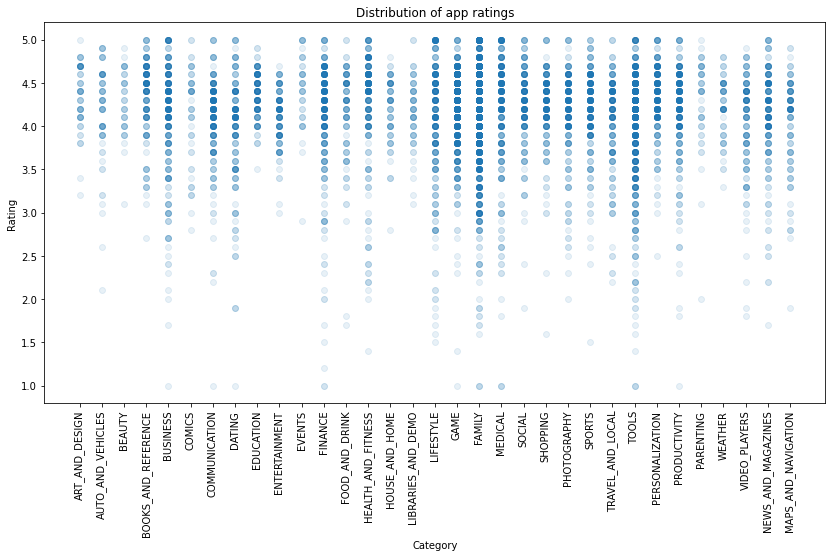

In [66]:
# Extra Analysis done w.r.t Rating vs Category
plt.figure(figsize=(14,7))
plt.scatter(google_apps['Category'], google_apps['Rating'], alpha =.1);
plt.title('Distribution of app ratings')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation = 90);

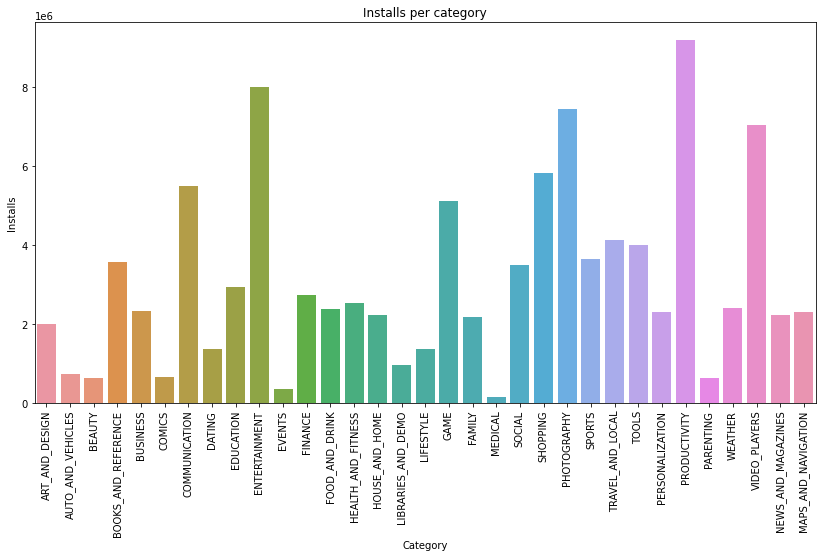

In [67]:
# Extra Analysis done w.r.t Installs vs category
plt.figure(figsize=(14,7))
sns.barplot(x='Category', y='Installs', data=google_apps, ci = None);
plt.title('Installs per category');
plt.xticks(rotation = 90);

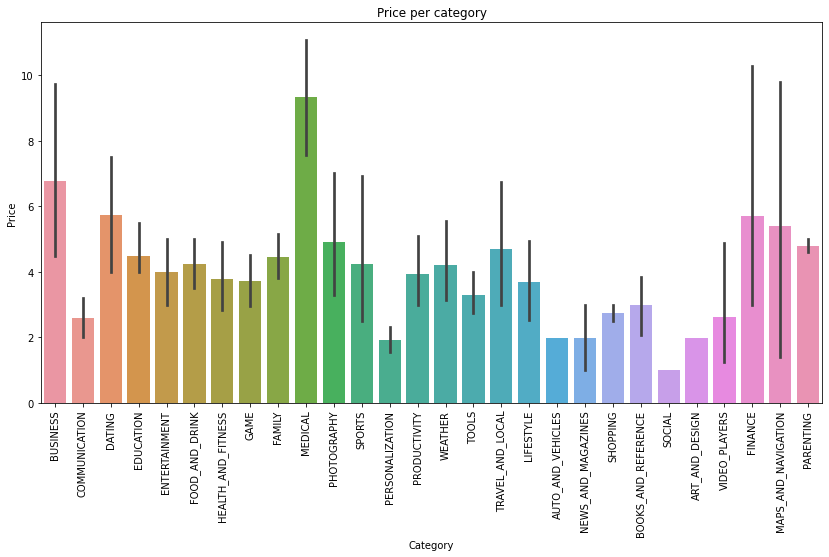

In [68]:
#Let's look at why family even though has lot of apps does not have the highest number of installs. Price could be one of the factors
paid_apps = google_apps[google_apps["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(14,7))
sns.barplot(x="Category", y="Price", data=paid_apps)
plt.title('Price per category')
plt.xticks(rotation=90)
plt.show()

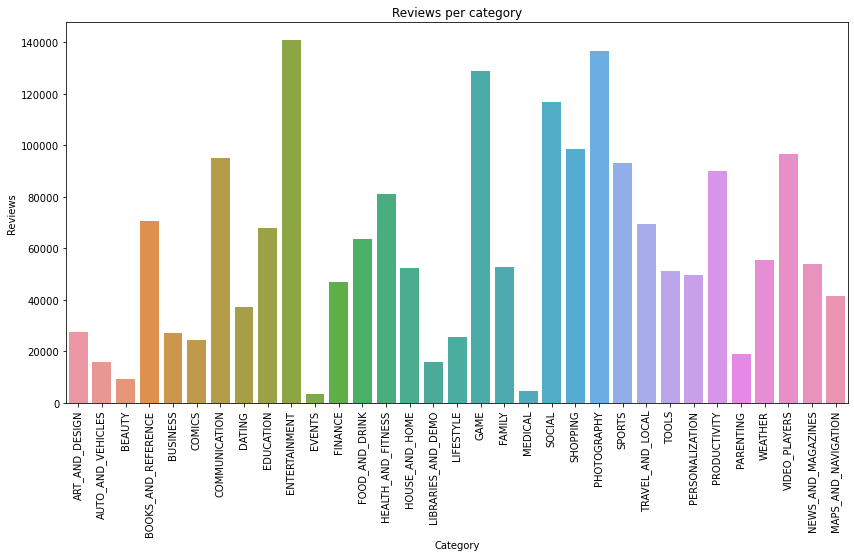

In [69]:
# Extra Analysis done w.r.t Reviews vs Category
plt.figure(figsize=(14,7))
sns.barplot(x='Category', y='Reviews', data=google_apps, ci = None);
plt.title('Reviews per category');
plt.xticks(rotation = 90);

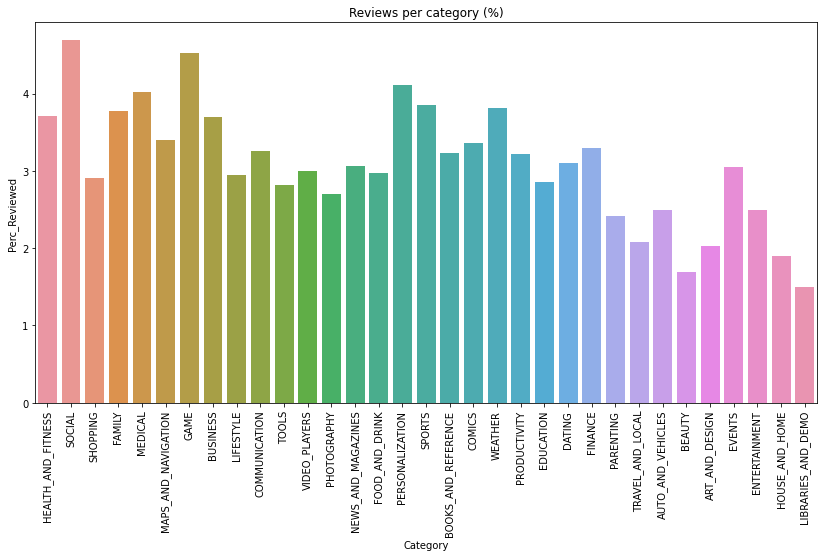

In [70]:
# Extra Analysis done w.r.t %_Reviews vs Category
plt.figure(figsize=(14,7))
google_apps['Perc_Reviewed'] = google_apps['Reviews']/google_apps['Installs']*100;
sns.barplot(x='Category', y='Perc_Reviewed', data=google_apps.sort_values(by='Perc_Reviewed', ascending=False), ci = None);
plt.title('Reviews per category (%)');
plt.xticks(rotation = 90);

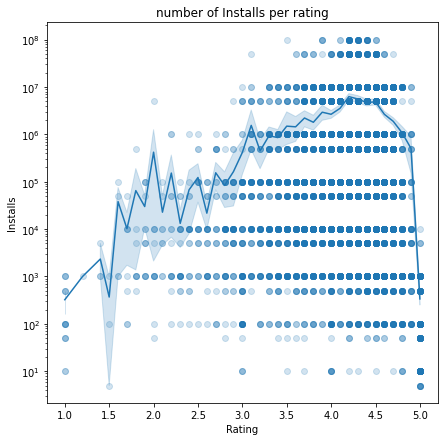

In [71]:
# Extra Analysis done w.r.t Installs vs Rating
plt.figure(figsize=(7,7))
plt.title('number of Installs per rating')
plt.scatter( x=google_apps['Rating'], y=google_apps['Installs'], alpha = 0.2)
sns.lineplot(x="Rating", y="Installs", data=google_apps) 
plt.yscale('log')

In [72]:
# Extra Analysis done on Category
google_apps_per_category = google_apps.groupby('Category')['App'].nunique()
google_apps_per_category = google_apps_per_category.to_frame()
google_apps_per_category['Category'] = google_apps_per_category.index
google_apps_per_category.columns=['Count', 'Category']
google_apps_per_category['Percentage'] = google_apps_per_category['Count']/google_apps_per_category.shape[0]
google_apps_per_category.sort_values(by='Percentage', ascending=False).head(10)

,Count,Category,Percentage
Category,,,
FAMILY,1625,FAMILY,49.242424
GAME,793,GAME,24.030303
TOOLS,689,TOOLS,20.878788
FINANCE,294,FINANCE,8.909091
LIFESTYLE,291,LIFESTYLE,8.818182
MEDICAL,287,MEDICAL,8.696970
PERSONALIZATION,287,PERSONALIZATION,8.696970
PRODUCTIVITY,281,PRODUCTIVITY,8.515152
BUSINESS,260,BUSINESS,7.878788


Here we can see that 51% of the apps in the app store are classified as family while 27% are games and 21% are tools. Let's not forget that a lot of apps are classified in several categoris and so the total percentage WILL BE higher than 100%

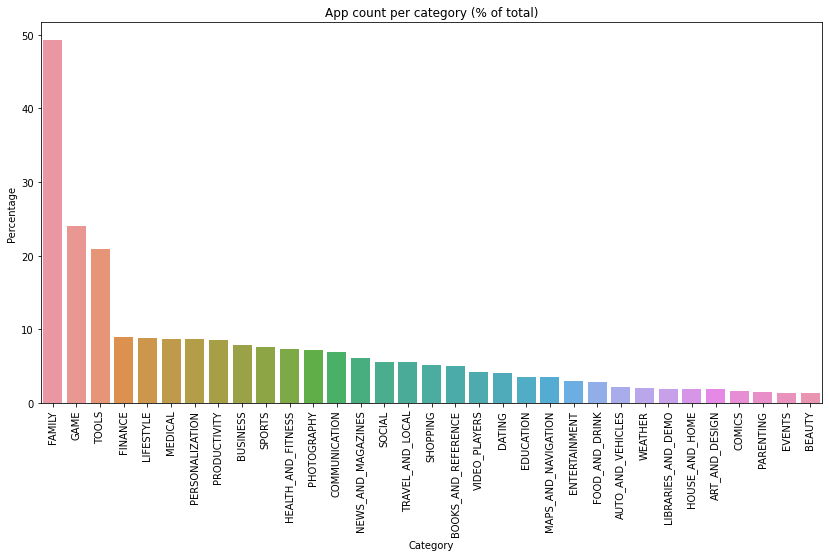

In [73]:
# Extra Analysis done on Category & %_app count
plt.figure(figsize=(14,7))
sns.barplot(x='Category', y='Percentage', data=google_apps_per_category.sort_values(by='Percentage', ascending=False), ci = None);
plt.title('App count per category (% of total)');
plt.xticks(rotation = 90);

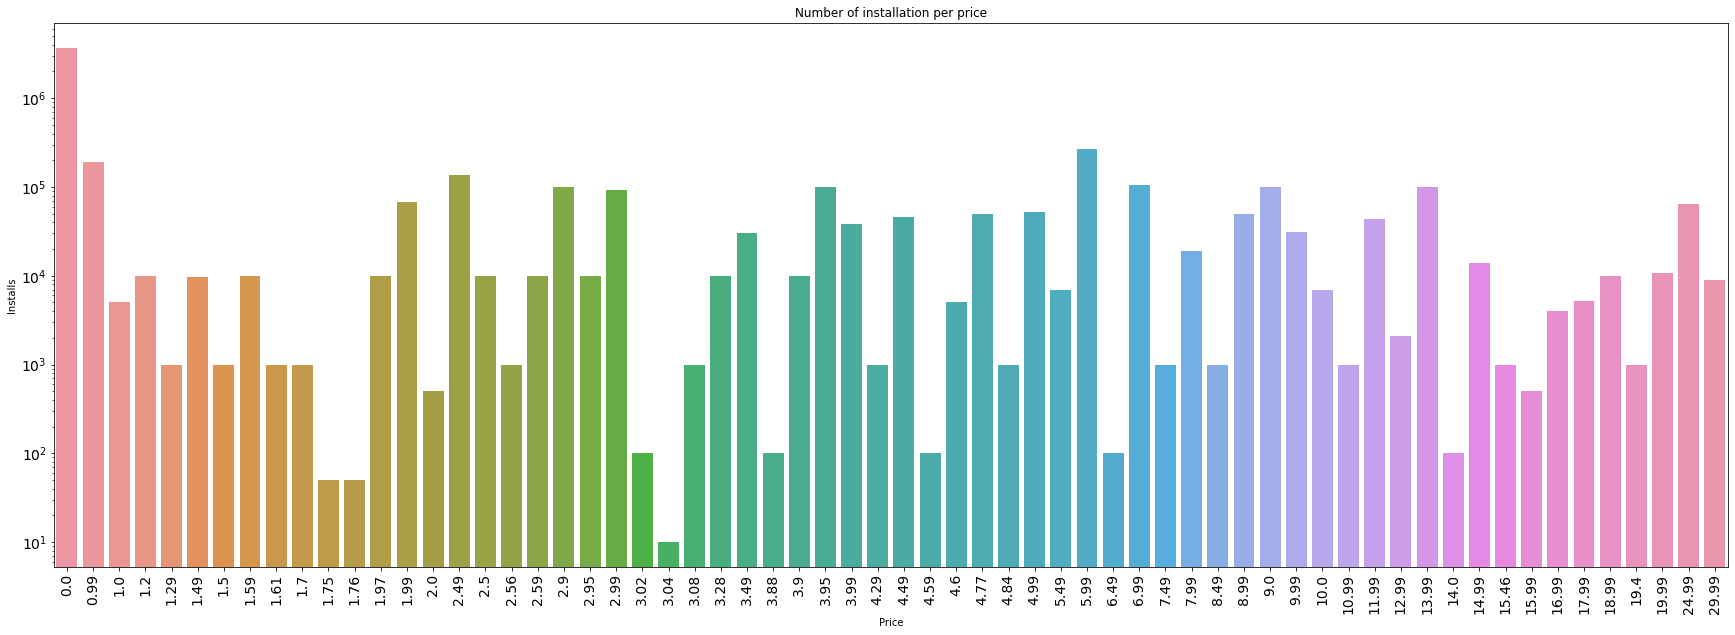

In [74]:
# Extra Analysis done on No. of Installs w.r.t Prices
plt.figure(figsize=(30, 10))
plt.title('Number of installation per price');
plt.xticks(rotation = 90, fontsize=14);
plt.yticks(fontsize=14);
plt.yscale('log')
sns.barplot(x='Price', y='Installs', data=google_apps, ci = None);

# Conslusion

The Top three category of Apps based on the number of Apps are
   - Family
   - Game
   - Tool
   
The bottom three category of Apps based on the number of Apps are
   - Parenting
   - Comics
   - Beauty

This is not the case when we look at the number of intalls. Based on number of installs, Communication,Video players and entertainment are the top 3 categories

To find out why, I looked at the price of paid apps in each category and clearly, communication was priced less than the family apps. This could be one of the reasons

The Average rating of the apps across all the categories is 4.17

The Performance of app depends on price and practicality.